In [1]:
!pip install scikit-plot

In [2]:
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')
from nltk.corpus import movie_reviews as mov_rev
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
nltk.download('stopwords')
import string
stop = stopwords.words('english')
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
# Part3
# from google.colab import drive
# drive.mount("/content/gdrive")
# Download data from Lab 2 folder on Canvas.
part3_df = pd.read_csv("/content/gdrive/MyDrive/Part3_Dataset.csv")
part3_df

Mounted at /content/gdrive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
# Preprocessing the data
lemmatizer = WordNetLemmatizer()
def rem_stop_punctuations(sentence):
    word_splt = word_tokenize(sentence)
    nltk_words = list(stopwords.words('english'))
    re_stop = [i for i in word_splt if i not in nltk_words]
    re_punc = [i for i in re_stop if i not in string.punctuation]
    lem_words = map(lemmatizer.lemmatize, re_punc)
    return ' '.join(list(lem_words))

part3_df["review"] = part3_df.apply(lambda row: rem_stop_punctuations(row["review"]), axis=1)


"""
Comments and Observations:
1) Removing Stopwords
2) Removing Punctuations
3) Lemmatization returns the base or dictionary form of a word which is commonly known as lemma.
   Lemmatization has better precision than porterstemmer.

"""

'\nComments and Observations:\n1) Removing Stopwords\n2) Removing Punctuations\n3) Lemmatization returns the base or dictionary form of a word which is commonly known as lemma.\n   Lemmatization has better precision than porterstemmer.\n\n'

In [6]:
# Split the data into 80% training set and 20% test set.
x_arr = np.array(part3_df["review"].values.tolist())
y_arr = np.array(part3_df["sentiment"].values.tolist())

train_x, test_x, train_y, test_y = train_test_split(x_arr,y_arr, test_size=0.2, random_state=1)

# **Comments and Observations:**

**Countvectorizer** - Convert a collection of text documents to a matrix of token counts

**Tfidfvectorizer** - Convert a collection of raw documents to a matrix of TF-IDF features.

  td-idf(w,d) = bow(w,d)*log(N/# documents in which word w appears)

Unigram - ngram_range(1,1)
  - One word sequence

Bigram - ngram_range(1,2)
  - Two word sequence
  

In [7]:
#Predict the number of positive and negative reviews using various algorithms to increase the performance of the prediction of the sentiment expressed in the review.
#Unigram
vectorizer1 = CountVectorizer(analyzer='word',tokenizer=nltk.word_tokenize, ngram_range=(1, 1))
count_unigram = vectorizer1.fit_transform(train_x)
testx_trans_countuni = vectorizer1.transform(test_x)
print(count_unigram.shape)

(40000, 134087)


Accuracy(CountVectorizer Unigram):  0.8604
              precision    recall  f1-score   support

    negative       0.85      0.89      0.86      5044
    positive       0.88      0.84      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

confusion_matrix:  [[4464  580]
 [ 816 4140]]


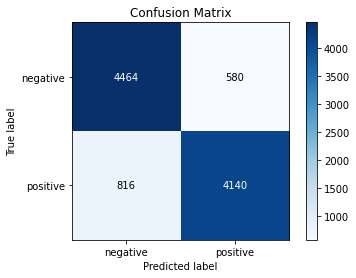

In [9]:
# Count Vectorizer Unigram
clf = MultinomialNB(alpha=1.0)
clf.fit(count_unigram, train_y)
y_pred = clf.predict(testx_trans_countuni)
print("Accuracy(CountVectorizer Unigram): ",accuracy_score(test_y,y_pred))
confusion_matrix_nb = confusion_matrix(test_y,y_pred)
skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,y_pred))
print('confusion_matrix: ', confusion_matrix_nb)


Accuracy Score:  0.7586
              precision    recall  f1-score   support

    negative       0.85      0.64      0.73      5044
    positive       0.71      0.88      0.78      4956

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.76      0.76     10000

confusion_matrix:  [[3216 1828]
 [ 586 4370]]


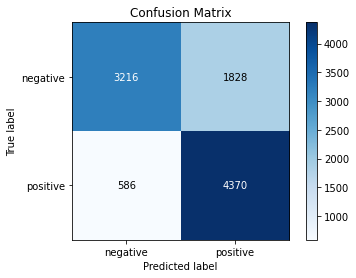

In [10]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(count_unigram, train_y)
pred_y = clf_rf.predict(testx_trans_countuni)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.8243
              precision    recall  f1-score   support

    negative       0.87      0.77      0.82      5044
    positive       0.79      0.88      0.83      4956

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

confusion_matrix:  [[3893 1151]
 [ 606 4350]]


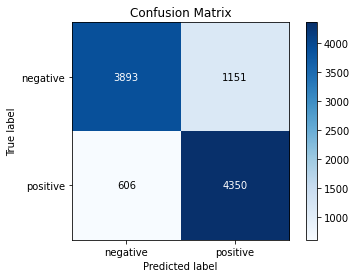

In [11]:
clf_xgb = XGBClassifier(max_depth=5)
clf_xgb.fit(count_unigram, train_y)
pred_y = clf_xgb.predict(testx_trans_countuni)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.804
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      5044
    positive       0.79      0.82      0.80      4956

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

confusion_matrix:  [[3995 1049]
 [ 911 4045]]


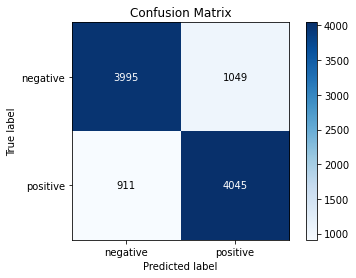

In [12]:
clf_rdg1 = RidgeClassifier(alpha=1.0)
clf_rdg1.fit(count_unigram, train_y)
pred_y = clf_rdg1.predict(testx_trans_countuni)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

In [13]:
#Bigram
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))
count_bigram = vectorizer2.fit_transform(train_x)
print(count_bigram.shape)
testx_trans_countbi = vectorizer2.transform(test_x)

(40000, 2605128)


Accuracy(CountVectorizer Bigram):  0.8863
              precision    recall  f1-score   support

    negative       0.87      0.90      0.89      5044
    positive       0.90      0.87      0.88      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

confusion_matrix:  [[4559  485]
 [ 652 4304]]


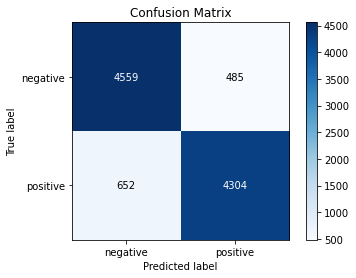

In [14]:
# Count Vectorizer Bigram
clf2 = MultinomialNB(alpha=1.0)
clf2.fit(count_bigram, train_y)
y_pred = clf2.predict(testx_trans_countbi)
print("Accuracy(CountVectorizer Bigram): ",accuracy_score(test_y,y_pred))
confusion_matrix_nb = confusion_matrix(test_y,y_pred)
skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=False)
print( classification_report(test_y,y_pred))
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.6743
              precision    recall  f1-score   support

    negative       0.79      0.48      0.60      5044
    positive       0.62      0.87      0.73      4956

    accuracy                           0.67     10000
   macro avg       0.71      0.68      0.66     10000
weighted avg       0.71      0.67      0.66     10000

confusion_matrix:  [[2430 2614]
 [ 643 4313]]


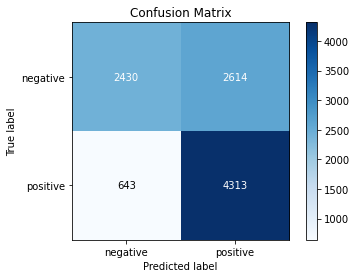

In [15]:
clf_rf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf1.fit(count_bigram, train_y)
pred_y = clf_rf1.predict(testx_trans_countbi)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.8232
              precision    recall  f1-score   support

    negative       0.86      0.77      0.81      5044
    positive       0.79      0.88      0.83      4956

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

confusion_matrix:  [[3894 1150]
 [ 618 4338]]


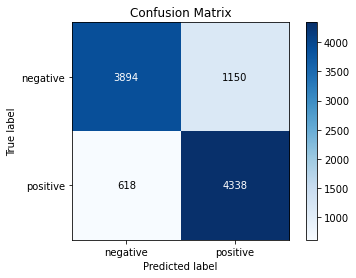

In [16]:
clf_xgb1 = XGBClassifier(max_depth=5)
clf_xgb1.fit(count_bigram, train_y)
pred_y = clf_xgb1.predict(testx_trans_countbi)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.8852
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5044
    positive       0.88      0.89      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

confusion_matrix:  [[4423  621]
 [ 527 4429]]


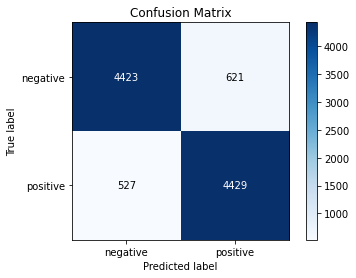

In [17]:
clf_rdg = RidgeClassifier(alpha=1.0)
clf_rdg.fit(count_bigram, train_y)
pred_y = clf_rdg.predict(testx_trans_countbi)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

In [18]:
#Unigram
vectorizer3 = TfidfVectorizer(ngram_range=(1, 1))
tfidf_unigram = vectorizer3.fit_transform(train_x)
print(tfidf_unigram.shape)
testx_trans_tfidfuni = vectorizer3.transform(test_x)

(40000, 88799)


Accuracy Score:  0.8944
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      5044
    positive       0.88      0.91      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

confusion_matrix:  [[4452  592]
 [ 464 4492]]


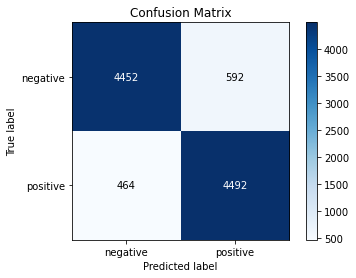

In [19]:
clf_rdg2 = RidgeClassifier(alpha=1.0)
clf_rdg2.fit(tfidf_unigram, train_y)
pred_y = clf_rdg2.predict(testx_trans_tfidfuni)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
print( classification_report(test_y,pred_y))
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.7559
              precision    recall  f1-score   support

    negative       0.82      0.66      0.73      5044
    positive       0.71      0.85      0.78      4956

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000

confusion_matrix:  [[3337 1707]
 [ 734 4222]]


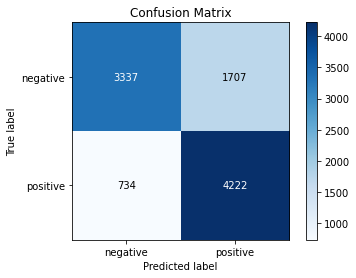

In [20]:
clf_rf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf2.fit(tfidf_unigram, train_y)
pred_y = clf_rf2.predict(testx_trans_tfidfuni)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy(TfIdfVectorizer Unigram):  0.8674
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      5044
    positive       0.88      0.85      0.86      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

confusion_matrix:  [[4453  591]
 [ 735 4221]]


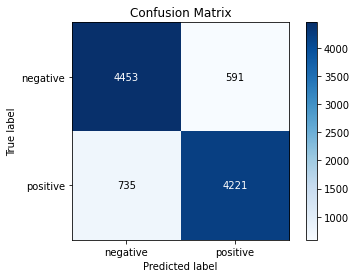

In [21]:
# TfIdf Vectorizer Unigram
clf3 = MultinomialNB(alpha=1.0)
clf3.fit(tfidf_unigram, train_y)
y_pred = clf3.predict(testx_trans_tfidfuni)
print("Accuracy(TfIdfVectorizer Unigram): ",accuracy_score(test_y,y_pred))
confusion_matrix_nb = confusion_matrix(test_y,y_pred)
skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,y_pred))
print('confusion_matrix: ', confusion_matrix_nb)

In [22]:
#Bigram
vectorizer4 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_bigram = vectorizer4.fit_transform(train_x)
print(tfidf_bigram.shape)
testx_trans_tfidfbi = vectorizer4.transform(test_x)

(40000, 2605128)


Accuracy(TfIdfVectorizer Bigram):  0.8917
              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      5044
    positive       0.90      0.88      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

confusion_matrix:  [[4557  487]
 [ 596 4360]]


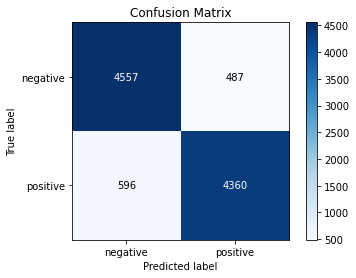

In [23]:
# TfIdf Vectorizer Bigram
# Preferred Algorithm
clf4 = MultinomialNB(alpha = 1.0)
clf4.fit(tfidf_bigram, train_y)
y_pred = clf4.predict(testx_trans_tfidfbi)
print("Accuracy(TfIdfVectorizer Bigram): ",accuracy_score(test_y,y_pred))
confusion_matrix_nb = confusion_matrix(test_y,y_pred)
skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,y_pred))
print('confusion_matrix: ', confusion_matrix_nb)


Accuracy Score:  0.6768
              precision    recall  f1-score   support

    negative       0.77      0.52      0.62      5044
    positive       0.63      0.84      0.72      4956

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.67     10000
weighted avg       0.70      0.68      0.67     10000

confusion_matrix:  [[2605 2439]
 [ 793 4163]]


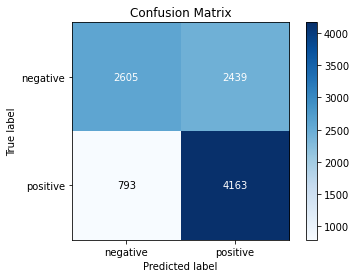

In [24]:
clf_rf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf3.fit(tfidf_bigram, train_y)
pred_y = clf_rf3.predict(testx_trans_tfidfbi)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

Accuracy Score:  0.8944
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      5044
    positive       0.88      0.91      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

confusion_matrix:  [[4452  592]
 [ 464 4492]]


'\nComments and Observations:\nPreferred algorith with better accuracy\n\n'

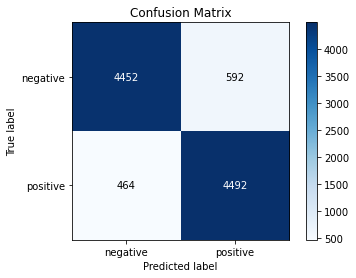

In [25]:
clf_rdg3 = RidgeClassifier(alpha=1.0)
clf_rdg3.fit(tfidf_unigram, train_y)
pred_y = clf_rdg3.predict(testx_trans_tfidfuni)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print( classification_report(test_y,pred_y))
print('confusion_matrix: ', confusion_matrix_nb)

"""
Comments and Observations:
Preferred algorith with better accuracy

"""

In [26]:
vectorizerh = HashingVectorizer(norm = None, n_features = 2)
hgram = vectorizerh.fit_transform(train_x)
testx_trans_hgram = vectorizerh.transform(test_x)
print(hgram.shape)

(40000, 2)


Accuracy Score:  0.543
              precision    recall  f1-score   support

    negative       0.54      0.60      0.57      5044
    positive       0.54      0.48      0.51      4956

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000

confusion_matrix:  [[3044 2000]
 [2570 2386]]


'\nComments and Observations:\nPreferred algorith with better accuracy\n\n'

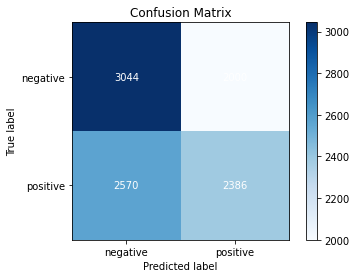

In [27]:
clf_rdgh = RidgeClassifier(alpha=1.0)
clf_rdgh.fit(hgram, train_y)
pred_y = clf_rdgh.predict(testx_trans_hgram)
print("Accuracy Score: ",accuracy_score(test_y,pred_y))
confusion_matrix_nb = confusion_matrix(test_y,pred_y)
skplt.metrics.plot_confusion_matrix(test_y,pred_y, normalize=False)
print( classification_report(test_y,pred_y))
#skplt.metrics.plot_confusion_matrix(test_y,y_pred, normalize=True)
print('confusion_matrix: ', confusion_matrix_nb)

"""
Comments and Observations:
Preferred algorith with better accuracy

"""

**Comments and Observations:**

There are several wordembedding techniques like CountVectorizer, TfIDfVectorizer, Hashing Vectorizer, Word2Vec etc., I've tried few word embedding techniques with n_grams.

Among which, Bigrams with TfIDFVectorizer seems to provide better accuracy with the Classification technique being used as RidgeClassifier(89.44%). Multinomial NaiveBayes classification also provides an accuracy of 89%.